In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start = time.time()
# read in the dataset
df = pd.read_csv(
    filepath_or_buffer='used_cars_data.csv', 
    header=None, 
    sep=',')

vals = df.iloc[:,:].values
print("Time taken to read dataset: %f seconds" % (time.time()-start))

/Users/jingshu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9,10,11,14,19,26,27,30,32,34,38,39,44,46,48,50,51,52,60,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Time taken to read dataset: 145.789903 seconds


In [2]:
nrow = len(vals)
ncol = len(vals[0])
print("size of dataset: ( %d, %d)" %(nrow, ncol))

# titleList contains the column title
titleList = vals[0].tolist()
print(titleList)

# carDocs contains cars' information, one row for a car
carDocs = vals[1:]


size of dataset: ( 3000041, 66)
['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy', 'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length', 'listed_date', 'listing_color', 'listing_id', 'longitude', 'main_picture_url', 'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title', 'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'vehicle_damage_category', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year']

In [3]:
# analyze percentage of nan of each column
nan_col = [0 for i in range(ncol)]
nDoc = nrow-1
for i in range(ncol):
    for j in range(nDoc):
        if str(carDocs[j][i])=='nan':
            nan_col[i] += 1

nan_col_percentage = [ n/nDoc for n in nan_col ]
print("Nan number for each column: \n", nan_col_percentage)
    

Nan number for each column: 
 [0.0, 0.05308895881388248, 0.9934774203010627, 0.8569692404101279, 0.8569692404101279, 0.00451427314302476, 0.9788226156984573, 0.0, 0.16375948320689057, 1.0, 0.0, 0.0, 0.025966653777949628, 0.03352655297929361, 0.05746123385021533, 0.03352655297929361, 8.666551112651832e-06, 0.47552532632898226, 0.47552532632898226, 0.0, 0.19087578832282237, 0.05308895881388248, 0.05308895881388248, 0.02757429900934654, 0.47552532632898226, 0.05308895881388248, 0.16375948320689057, 0.05746123385021533, 5.4999266676444314e-05, 0.47552532632898226, 1.0, 0.9390348128691618, 0.0, 0.9548799349342009, 0.0, 0.05308895881388248, 0.0, 0.0, 0.0, 0.0, 0.12302935960853856, 0.06668177757629898, 0.0, 0.05308895881388248, 0.048128358288556154, 0.0, 0.5056642578098959, 0.1604731936907508, 0.0, 0.47552532632898226, 0.0, 0.01362381834908868, 3.199957333902215e-05, 0.0, 0.47552532632898226, 0.17259536539512807, 0.02139471473713684, 0.02139471473713684, 0.03860848522019707, 0.038764149811335

In [4]:
col_small_thresh = 0.40
col_AllNan = 0
col_small = 0
col_full = 0
for n in nan_col_percentage:
    if n == 0.0:
        col_AllNan += 1
    elif n < col_small_thresh:
        col_small += 1
    elif n == 1.0:
        col_full += 1

print("col_AllNan: %d, col_small: %d, col_full: %d" %(col_AllNan, col_small, col_full))
print("Num of cols above threshold(%.2f): %d (%.2f)" %(col_small_thresh, (ncol-col_AllNan-col_small), ((ncol-col_AllNan-col_small)/ncol)))


col_AllNan: 17, col_small: 33, col_full: 3
Num of cols above threshold(0.40): 16 (0.24)


In [5]:
# analyze percentage of nan of each row
nan_row = [0 for i in range(nDoc)]
for i in range(nDoc):
    for j in range(ncol):
        if str(carDocs[i][j])=='nan':
            nan_row[i] += 1

print("max of nan_row: ",np.max(nan_row))
print("min of nan_row: ",np.min(nan_row))
print("avg of nan_row: %.2f" %np.average(nan_row))


max of nan_row:  44
min of nan_row:  3
avg of nan_row: 13.92


In [6]:
nan_percentage_row = [ n/ncol for n in nan_row ]

row_small_thresh = 0.30
row_small = 0

for n in nan_percentage_row:
    
    if n < 0.4:
        row_small += 1

print("Num of rows above threshold(%.2f): %d (%.2f)" %(row_small_thresh, (nDoc-row_small), ((nDoc-row_small)/nDoc)))


Num of rows above threshold(0.30): 139657 (0.05)


In [7]:
# analyze make_name
index_make_name = titleList.index("make_name")

make_name = set(carDocs[:,index_make_name])
print("num of maker: ", len(make_name))
print(make_name)


num of maker:  100
{'Buick', 'Lotus', 'Cadillac', 'FIAT', 'Dodge', 'BMW', 'Eagle', 'Chevrolet', 'Bentley', 'Plymouth', 'Land Rover', 'Pontiac', 'Porsche', 'Allard', 'Lamborghini', 'Sunbeam', 'Koenigsegg', 'Shelby', 'Ariel', 'Volvo', 'Oldsmobile', 'Willys', 'Freightliner', 'Morris', 'Maybach', 'Geo', 'Daewoo', 'Saleen', 'Jensen', 'Pagani', 'Acura', 'Subaru', 'Chrysler', 'Saturn', 'Aston Martin', 'Bugatti', 'Maserati', 'Genesis', 'Nissan', 'Hummer', 'McLaren', 'Bricklin', 'Hyundai', 'Hillman', 'Ford', 'Mitsubishi', 'AMC', 'AM General', 'Rolls-Royce', 'Honda', 'INFINITI', 'Pininfarina', 'Fisker', 'Nash', 'Karma', 'Franklin', 'Alfa Romeo', 'Mercury', 'Jeep', 'Hudson', 'Clenet', 'Ferrari', 'Edsel', 'DeLorean', 'Toyota', 'Spyker', 'MG', 'Lexus', 'Tesla', 'Austin', 'Mazda', 'Humber', 'DeSoto', 'Kia', 'Suzuki', 'Volkswagen', 'Studebaker', 'International Harvester', 'Jaguar', 'RAM', 'Mobility Ventures', 'Lincoln', 'VPG', 'smart', 'GMC', 'Mercedes-Benz', 'Packard', 'MINI', 'Scion', 'SRT', 'Audi'

num of year:  98
year: [1915, 1921, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
year 2021: 176526 (percentage:0.06):


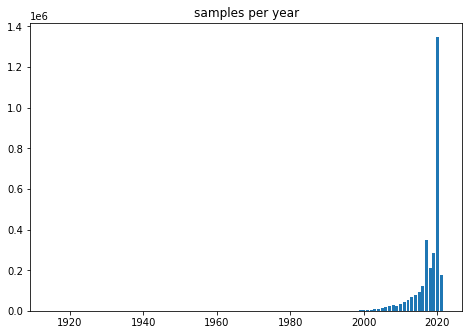

In [9]:
# analyze year
index_year = titleList.index("year")

year_list = [int(car) for car in carDocs[:,index_year]]
year = set(year_list)
print("num of year: ", len(year))
print("year:", list(year))

num_year = [ 0 for i in range(len(year))]
for i, y in enumerate(year):
    num_year[i] = year_list.count(y)
    
print("year %d: %d (percentage:%.2f):" %(list(year)[-1], num_year[-1], (num_year[-1]/nDoc)))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(year),num_year)
plt.title("samples per year")
plt.show()
